## FREQUENT CATEGORY IMPUTATION
  1) here we replace the NaN value with the most frequent repeated feature in the column.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_csv('house pricing .csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [3]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [4]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<Axes: >

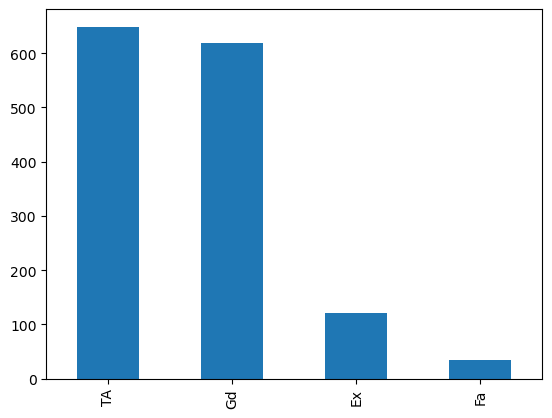

In [5]:
 df['BsmtQual'].value_counts().plot.bar()

<Axes: >

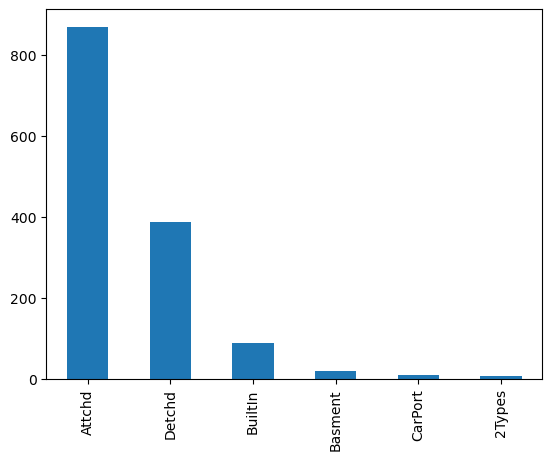

In [6]:
 df['GarageType'].value_counts().plot.bar()

<Axes: >

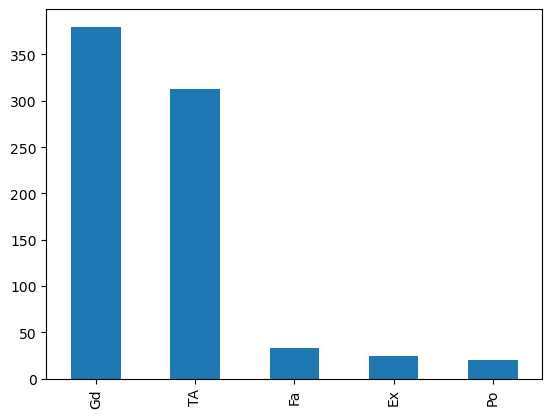

In [7]:
df['FireplaceQu'].value_counts().plot.bar()

In [8]:
df['FireplaceQu'].value_counts().index[0]

'Gd'

In [9]:
 df['GarageType'].value_counts().index[0]

'Attchd'

In [10]:
def nan_value(df,columns):
    most_frequent_category=df[columns].value_counts().index[0]
    df[columns].fillna(most_frequent_category,inplace=True)

In [11]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    nan_value(df,feature)

In [12]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [13]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

## we can also use the mode which is also used for getting the most frequently repeated value

In [14]:
df['GarageType'].mode()[0]

'Attchd'

## DISADVANTAGE
1) it is not usefull when we have a heavy percentage of the missing values in a particular column that frequent label will represent more.
2) it distorts the relation with the other relation.

## adding a new feature for capturing the NaN values

In [15]:
df= pd.read_csv('house pricing .csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [16]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [17]:
for col in df:
    print(col,':',len(df[col].unique()),'lables')

BsmtQual : 5 lables
FireplaceQu : 6 lables
GarageType : 7 lables
SalePrice : 663 lables


## caturing the nan values in a new variable

In [18]:
df['nan_BsmtQual']=np.where(df['BsmtQual'].isnull(),1,0)
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,nan_BsmtQual
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [20]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,nan_BsmtQual
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [22]:
frequent_category=df['BsmtQual'].mode()[0]

In [23]:
df['BsmtQual'].fillna(frequent_category,inplace=True)

In [24]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,nan_BsmtQual
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [25]:
df['FireplaceQu_nan']=np.where(df['FireplaceQu'].isnull(),1,0)
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,nan_BsmtQual,FireplaceQu_nan
0,Gd,NaN,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,NaN,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


In [26]:
frequent_category=df['FireplaceQu'].mode()[0]

In [27]:
df['FireplaceQu'].fillna(frequent_category,inplace=True)
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,nan_BsmtQual,FireplaceQu_nan
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


## very frequently used technique to replace the nan values in the categorical data
here we are replacing the NaN with the new category name

In [30]:
df= pd.read_csv('house pricing .csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,NaN,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [31]:
def impute_nan(dataframe,column):
    df[column+"_newvar"]=np.where(df[column].isnull(),'missing',df[column])

In [32]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [33]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


In [34]:
df.drop(['BsmtQual','FireplaceQu','GarageType'],inplace=True,axis=1)

In [35]:
df.head(10)

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
5,143000,Gd,missing,Attchd
6,307000,Ex,Gd,Attchd
7,200000,Gd,TA,Attchd
8,129900,TA,TA,Detchd
9,118000,TA,TA,Attchd


## one hot encoding in the catrgorical features

In [ ]:
df=pd.read_csv('titanic_train-Copy1.csv',usecols=['Sex','Embarked'])
df.head()

In [ ]:
sexcol=pd.get_dummies(df['Sex'],drop_first=True)
sexcol

In [ ]:
df.head()

In [ ]:
df['Embarked'].unique()

In [ ]:
df['Embarked'].dropna(inplace=True,axis=0)

In [ ]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
embark

In [ ]:
df=pd.concat([sexcol,embark],axis=1)

In [ ]:
df.head()

## KDD ORANGE CUP TECHNIQUE OF TAKING THE TOP 10 CATEGORIES AND CONVERTING THEM INTO BINARY

In [37]:
df=pd.read_csv('mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5'])
df.head()

,X1,X2,X3,X4,X5
0,v,at,a,d,u
1,t,av,e,d,y
2,w,n,c,d,x
3,t,n,f,d,x
4,v,n,f,d,h


In [38]:
for col in df:
    print(col,':',len(df[col].unique()),'labels')

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels


In [39]:
top10=[i for i in df['X1'].value_counts().head(10).index]
top10

['aa', 's', 'b', 'l', 'v', 'r', 'i', 'a', 'c', 'o']

In [40]:
for label in top10:
    df[label]=np.where(df['X1']==label,1,0)
df[['X1']+top10].head(20)

,X1,aa,s,b,l,v,r,i,a,c,o
0,v,0,0,0,0,1,0,0,0,0,0
1,t,0,0,0,0,0,0,0,0,0,0
2,w,0,0,0,0,0,0,0,0,0,0
3,t,0,0,0,0,0,0,0,0,0,0
4,v,0,0,0,0,1,0,0,0,0,0
5,b,0,0,1,0,0,0,0,0,0,0
6,r,0,0,0,0,0,1,0,0,0,0
7,l,0,0,0,1,0,0,0,0,0,0
8,s,0,1,0,0,0,0,0,0,0,0
9,b,0,0,1,0,0,0,0,0,0,0


In [41]:
top10=[i for i in df.X2.value_counts().head(10).index]
top10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [42]:
def kdd(dataframe,col,top10):
    for labels in top10:
        df[col+'_'+labels]=np.where(df[col]==labels,1,0)
kdd(df,'X2',top10)
pd.set_option('display.max_columns',60)
df.head()

,X1,X2,X3,X4,X5,aa,s,b,l,v,r,i,a,c,o,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [43]:
df.drop(['X1','X2','X3','X4','X5'],inplace=True,axis=1)

In [44]:
df.head(10)

,aa,s,b,l,v,r,i,a,c,o,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## ORDINAL NUMBER ENCODING:
1) here the categories are ordered in such a way where we can assign the ranks

In [45]:
import datetime

In [46]:
today_date=datetime.datetime.today()

In [47]:
today_date

datetime.datetime(2023, 9, 19, 12, 41, 3, 313974)

In [50]:
today_date-datetime.timedelta(2)

datetime.datetime(2023, 9, 17, 12, 41, 3, 313974)

In [276]:
## list comprehension
days=[today_date-datetime.timedelta(x) for x in range(0,15)]
days

[datetime.datetime(2023, 9, 19, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 18, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 17, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 16, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 15, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 14, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 13, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 12, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 11, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 10, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 9, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 8, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 7, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 6, 12, 41, 3, 313974),
 datetime.datetime(2023, 9, 5, 12, 41, 3, 313974)]

In [85]:
df=pd.DataFrame(data=days,columns=['DATE'])

In [86]:
df.head()

,DATE
0,2023-09-19 12:41:03.313974
1,2023-09-18 12:41:03.313974
2,2023-09-17 12:41:03.313974
3,2023-09-16 12:41:03.313974
4,2023-09-15 12:41:03.313974


In [87]:
df['DAYS']=df['DATE'].dt.strftime('%A')

In [88]:
df.head()

,DATE,DAYS
0,2023-09-19 12:41:03.313974,Tuesday
1,2023-09-18 12:41:03.313974,Monday
2,2023-09-17 12:41:03.313974,Sunday
3,2023-09-16 12:41:03.313974,Saturday
4,2023-09-15 12:41:03.313974,Friday


In [89]:
## making a dictionary

In [90]:
dictinary={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

In [91]:
dictinary

{'Monday': 1,
 'Tuesday': 2,
 'Wednesday': 3,
 'Thursday': 4,
 'Friday': 5,
 'Saturday': 6,
 'Sunday': 7}

In [93]:
df['weekdays ranking']=df['DAYS'].map(dictinary)

In [94]:
df.head()

,DATE,DAYS,weekdays ranking
0,2023-09-19 12:41:03.313974,Tuesday,2
1,2023-09-18 12:41:03.313974,Monday,1
2,2023-09-17 12:41:03.313974,Sunday,7
3,2023-09-16 12:41:03.313974,Saturday,6
4,2023-09-15 12:41:03.313974,Friday,5


## count or frequency encoding 
1) replacing the label with its total count

In [95]:
df=pd.read_csv('mercedesbenz.csv',usecols=['X1','X2','X3','X4','X5'])
df.head()

,X1,X2,X3,X4,X5
0,v,at,a,d,u
1,t,av,e,d,y
2,w,n,c,d,x
3,t,n,f,d,x
4,v,n,f,d,h


In [97]:
for col in df.columns:
    print(col,':',len(df[col].unique()),'labels')

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels


In [110]:
frequency_count=df['X5'].value_counts().to_dict()
frequency_count

{'w': 231,
 'v': 231,
 'q': 220,
 'r': 215,
 's': 214,
 'd': 214,
 'n': 212,
 'p': 208,
 'm': 208,
 'i': 207,
 'ae': 205,
 'ag': 204,
 'ac': 200,
 'ab': 197,
 'l': 195,
 'af': 188,
 'ad': 185,
 'k': 177,
 'c': 131,
 'j': 125,
 'aa': 112,
 'ah': 97,
 'o': 20,
 'f': 7,
 'x': 2,
 'y': 1,
 'g': 1,
 'h': 1,
 'u': 1}

In [103]:
df['X5_frequncy']=df['X5'].map(frequency_count)

In [106]:
df.head(29)

,X1,X2,X3,X4,X5,X5_frequncy
0,v,at,a,d,u,1
1,t,av,e,d,y,1
2,w,n,c,d,x,2
3,t,n,f,d,x,2
4,v,n,f,d,h,1
5,b,e,c,d,g,1
6,r,e,f,d,f,7
7,l,as,f,d,f,7
8,s,as,e,d,f,7
9,b,aq,c,d,f,7


In [109]:
df.X5.value_counts()

w     231
v     231
q     220
r     215
s     214
d     214
n     212
p     208
m     208
i     207
ae    205
ag    204
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
j     125
aa    112
ah     97
o      20
f       7
x       2
y       1
g       1
h       1
u       1
Name: X5, dtype: int64

## ADVANTAGES:
1) EASY TO IMPLEMENT.
2) NOT INCREASING THE FEATURE SPACE.
## DISADVANTAGES:
1) IF THE TWO LABELS HAVE THE SAME WEIGHT THEN THE FREQUNCY COUNT WILL BE REPEATED IN THIS CASE.

## TARGET GUIDED ORDINAL ENCODING:
1) ordering the labels according to the target.
2) replacing the labels by the joint probability of being 1 or 0

In [112]:
df=pd.read_csv('titanic_train-Copy1.csv',usecols=['Survived','Cabin'])

In [113]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [114]:
df['Cabin'].fillna('missing',inplace=True)

In [116]:
df.head(10)

,Survived,Cabin
0,0,missing
1,1,C85
2,1,missing
3,1,C123
4,0,missing
5,0,missing
6,0,E46
7,0,missing
8,1,missing
9,1,missing


In [119]:
df.Cabin.value_counts()

missing        687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

In [124]:
## getting the first index number from cabin column
df['Cabin']=df.Cabin.astype(str).str[0]

In [126]:
df.head(20)

,Survived,Cabin
0,0,m
1,1,C
2,1,m
3,1,C
4,0,m
5,0,m
6,0,E
7,0,m
8,1,m
9,1,m


In [127]:
df.Cabin.unique()

array(['m', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [128]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
m    0.299854
Name: Survived, dtype: float64

In [132]:
## getting values in ascending order
df.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
m    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [134]:
## getting the index:
target=df.groupby(['Cabin'])['Survived'].mean().sort_values().index
target

Index(['T', 'm', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [139]:
## making a dictinary on to these labels according to their values ie,greater value will get higher label
target_achieved={k:i for i ,k in enumerate(target,0)}
target_achieved

{'T': 0, 'm': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [140]:
## mapping the function with the target achieved
df['cabin_values']=df.Cabin.map(target_achieved)

In [141]:
df.head()

,Survived,Cabin,cabin_values
0,0,m,1
1,1,C,4
2,1,m,1
3,1,C,4
4,0,m,1


## Mean encoding

In [150]:
## mean encoding
mean_encode=df.groupby(['Cabin'])['Survived'].mean().sort_values()
mean_encode

Cabin
T    0.000000
m    0.299854
A    0.466667
G    0.500000
C    0.593220
F    0.615385
B    0.744681
E    0.750000
D    0.757576
Name: Survived, dtype: float64

In [147]:
df['cabin_mean']=df.Cabin.map(mean_encode)

In [148]:
df.head()

,Survived,Cabin,cabin_values,cabin_mean
0,0,m,1,0.299854
1,1,C,4,0.593220
2,1,m,1,0.299854
3,1,C,4,0.593220
4,0,m,1,0.299854


In [158]:
df=pd.read_csv('titanic_train-Copy1.csv',usecols=['Survived','Cabin'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [164]:
df['Cabin']=np.where(df.Cabin.isnull(),1,0)

In [165]:
df.head()

,Survived,Cabin
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0


In [163]:
df.groupby(['Survived'])['Cabin'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin, dtype: float64

## PROBABILITY RATIO ENCODING
  here we are basically replacing the cabin(categorical values) with the "probability ratio" that we have calculated through the survived column

In [173]:
df=pd.read_csv('titanic_train-Copy1.csv',usecols=['Survived','Cabin'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [174]:
df['Cabin']=np.where(df.Cabin.isnull(),'missing',df['Cabin'])

In [175]:
df.head()

,Survived,Cabin
0,0,missing
1,1,C85
2,1,missing
3,1,C123
4,0,missing


In [176]:
df.Cabin.unique()

array(['missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [179]:
df['Cabin']=df.Cabin.astype(str).str[0]

In [180]:
df.head()

,Survived,Cabin
0,0,m
1,1,C
2,1,m
3,1,C
4,0,m


In [188]:
prob=df.groupby(['Cabin'])['Survived'].mean()
prob.head()


Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
Name: Survived, dtype: float64

In [183]:
new_df=pd.DataFrame(data=prob)

In [184]:
new_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
T,0.000000
m,0.299854


In [185]:
new_df['Died']=1-new_df['Survived']

In [186]:
new_df.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [189]:
new_df['probability_ratio']=new_df['Survived']/new_df['Died']

In [190]:
new_df.head()

,Survived,Died,probability_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [195]:
probability=new_df['probability_ratio'].to_dict()
probability

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'T': 0.0,
 'm': 0.42827442827442824}

In [193]:
df['cabin_probability']=df['Cabin'].map(probability)

In [194]:
df.head()

,Survived,Cabin,cabin_probability
0,0,m,0.428274
1,1,C,1.458333
2,1,m,0.428274
3,1,C,1.458333
4,0,m,0.428274


In [251]:
df=pd.read_csv('titanic_train-Copy1.csv',usecols=['Survived','Cabin'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [252]:
df['Cabin']=np.where(df['Cabin'].isnull(),'Missing',df['Cabin'])

In [253]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [254]:
df['Cabin']=df.Cabin.fillna('Missing')

In [255]:
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [256]:
df['Cabin']=df.Cabin.astype(str).str[0]

In [257]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [261]:
data=df.groupby(['Cabin'])['Survived'].mean()

In [262]:
ratioframe=pd.DataFrame(data=data)

In [264]:
ratioframe.head()

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000


In [265]:
ratioframe['Died']=1-ratioframe['Survived']

In [266]:
ratioframe.head()

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000


In [268]:
ratioframe['probability']=ratioframe['Survived']/ratioframe['Died']

In [269]:
ratioframe.head()

,Survived,Died,probability
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000


In [274]:
pr=ratioframe['probability'].to_dict()
pr

{'A': 0.875,
 'B': 2.916666666666666,
 'C': 1.4583333333333333,
 'D': 3.125,
 'E': 3.0,
 'F': 1.6000000000000003,
 'G': 1.0,
 'M': 0.42827442827442824,
 'T': 0.0}

In [275]:
df['cabin_ratio']=df['Cabin'].map(pr)

In [273]:
df.head()

,Survived,Cabin,cabin_ratio
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
